In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mglearn
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

X.shape:  (26, 2)


/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


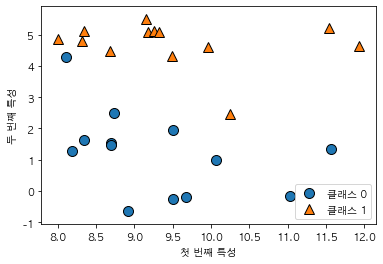

In [2]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()

# 산점도 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: ", X.shape)

Text(0, 0.5, '타깃')

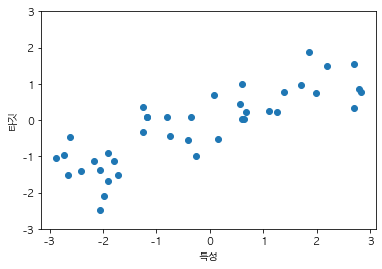

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [6]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## KNN

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


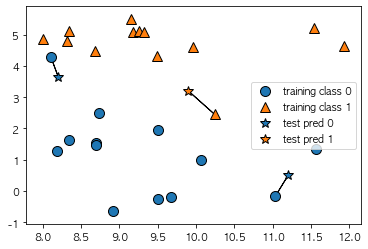

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


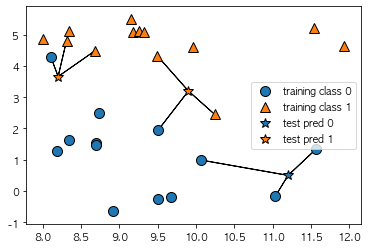

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


## KNN Classifier 분석 - Decision Boundary

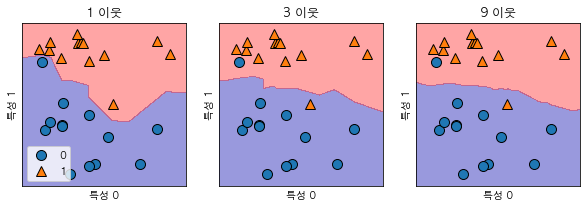

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

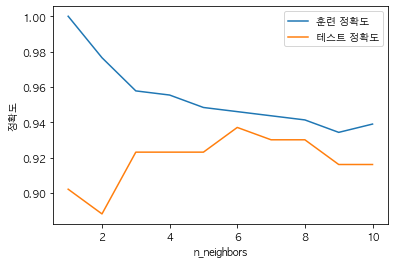

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

## KNN - 회귀

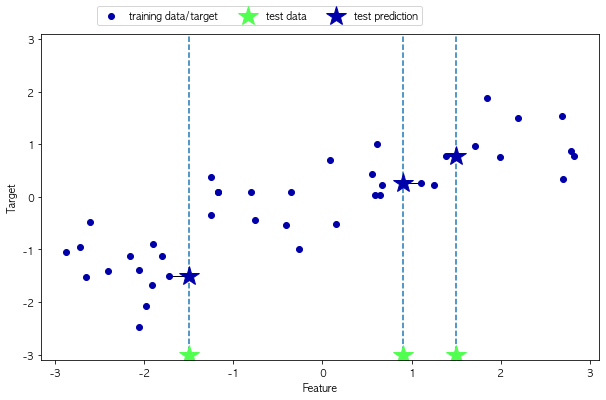

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

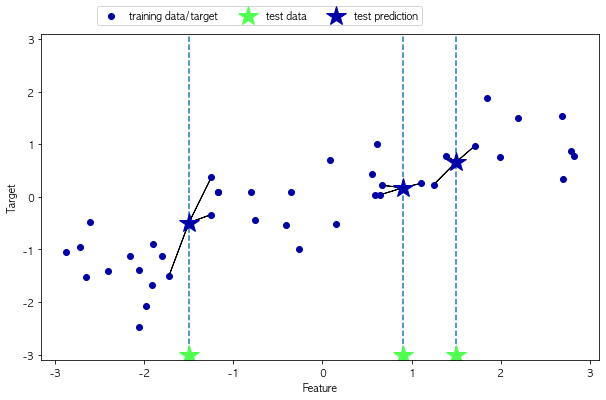

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("테스트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 R^2: 0.83


## KNN Regressor 분석 

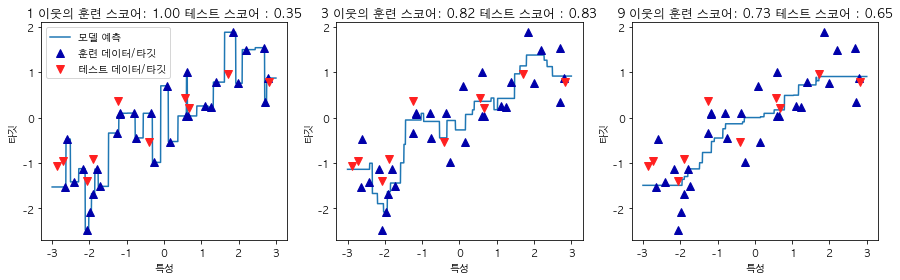

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3과 3사이에 1,000개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax, in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어 : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

## Linear Model

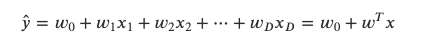

위 식에서 독립변수 𝑥=(𝑥1,𝑥2,…,𝑥𝐷)는 𝐷차원 벡터다. 가중치 벡터 𝑤=(𝑤0,⋯,𝑤𝐷)는 함수 𝑓(𝑥)의 계수(coefficient)이자 이 선형회귀모형의 **모수(parameter)** 라고 한다.


회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원(특성이 더 많음)에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가지고 있습니다.


이 직선과 KNeighborsRegressor를 사용하여 만든 선과 비교해보면 직선을 사용한 예측이 더 제약이 많아 보입니다. 즉 데이터의 상세 정보를 모두 잃어버린 것처럼 보입니다. 어느 정도는 사실입니다. 타깃 y가 특성들의 선형 조합이라는 것은 매우 과한 (때론 비현실적인) 가정입니다. 하지만 1차원 데이터만 놓고 봐서 생긴 편견일 수 있습니다. 특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있습니다. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련 세트에 대해서) 선형 함수로 모델링할 수 있습니다.

w[0]: 0.393906  b: -0.031804


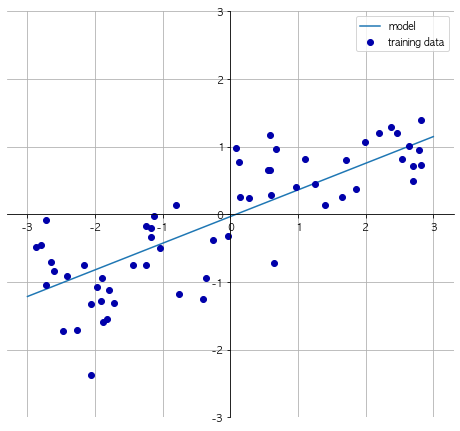

In [25]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression(OLS - Ordinary Least Square)

선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없음.

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

coef_와 intercept_ 뒤의 밑줄이 이상하게 보일지 모르겠습니다. scikit-learn은 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄을 붙입니다. 
그 이유는 사용자가 지정한 매개변수와 구분하기 위해서입니다.

In [27]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [28]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수 : 0.61


### 선형모델의 과대적합 그리고 Regularization

훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 합니다.

기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 리지 회귀(L2 규제)입니다.

## Ridge

Ridge도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용합니다. 하지만 리지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있습니다. 가중치의 절댓값을 가능한 한 작게 만드는 것입니다. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원합니다. 직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만듭니다 (기울기를 작게 만듭니다). 이런 제약을 규제(Regularization)라고 합니다. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미입니다. 리지 회귀에 사용하는 규제 방식을 L2 규제라고 합니다.

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


---
Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공합니다. 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있습니다. 앞의 예제에서는 매개변수의 기본값인 alpha=1.0을 사용했습니다. 하지만 이 값이 최적이라고 생각할 이유는 없습니다. 최적의 alpha 값은 사용하는 데이터셋에 달렸습니다. alpha값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있습니다.

In [32]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


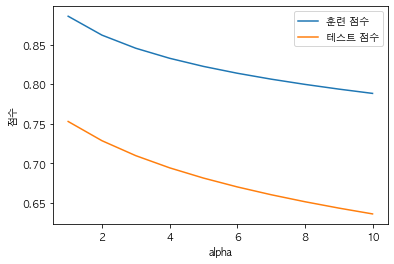

In [33]:
train_scores = []
test_scores = []

for alpha in range(1, 11):
    model = Ridge(alpha=alpha).fit(X_train, y_train)
#     print("훈련 세트 점수: {:.2f}".format(model.score(X_train, y_train)))
#     print("테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
plt.plot(range(1, 11), train_scores, label="훈련 점수")
plt.plot(range(1, 11), test_scores, label="테스트 점수")
plt.ylabel("점수")
plt.xlabel("alpha")
plt.legend()

In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


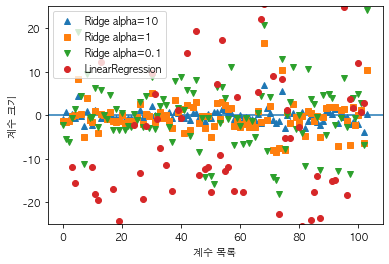

In [35]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

---
아래 그래프에서 흥미로운 점

- 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아짐
- 선형 회귀의 훈련 데이터 성능이 감소한다는 것. (데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문)

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

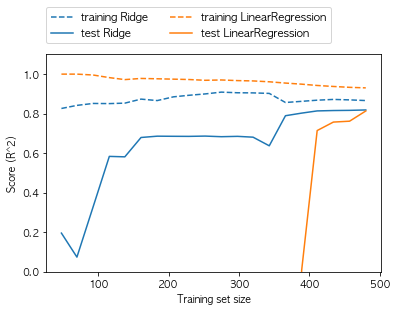

In [36]:
mglearn.plots.plot_ridge_n_samples()

## Lasso

선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있습니다. 리지 회귀에서와 같이 Lasso도 계수를 0에 가깝게 만들려고 합니다. 하지만 방식이 조금 다르며 이를 L1 규제라고 합니다. L1 규제의 결과로 라소를 사용할 때 어떤 계수는 정말 0이 됩니다. 이 말은 모델에서 완전히 제외되는 특성이 생긴다는 뜻입니다. 어떻게 보면 특성 선택(Feature Selection)이 자동으로 이뤄진다고 볼 수 있습니다. 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내줍니다.

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


--- 
### Lasso의 alpha 매개변수 그리고 max_iter

Ridge와 마찬가지로 Lasso도 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수를 지원합니다. 앞에서는 기본값인 alpha=1.0을 사용했습니다. 과소적합을 줄이기 위해서 alpha 값을 줄여보겠습니다. 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 합니다.

--- 
Lasso는 L1, L2 규제를 함께 쓰는 엘라스틱넷(Elastic-Net)방식에서 L2 규제가 빠진 것입니다. Lasso의 alpha 매개변수는 R의 엘라스틱넷 패키지인 glmnet의 lambda 매개변수와 같은 의미입니다. 이들은 한 특성씩 좌표축을 따라 최적화하는 좌표 하강법(coordinate descent) 방식을 사용하며 학습 과정이 반복적으로 여러 번 진행되면서 최적의 값을 찾아가게 됩니다. alpha값을 줄이게 되면 가장 낮은 오차를 찾아가는 이 반복 횟수가 늘어나게 됩니다. 모델이 반복한 횟수는 Lasso 객체의 n_iter_ 속성에 저장됩니다. 

In [38]:
# max_iter 기본값을 증가시키지 않으면 max_iter값을 늘리라는 경고가 발생합니다.
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 :", np.sum(lasso001.coef_ != 0))


훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 : 33


In [39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 :", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 : 96


Text(0, 0.5, '계수 크기')

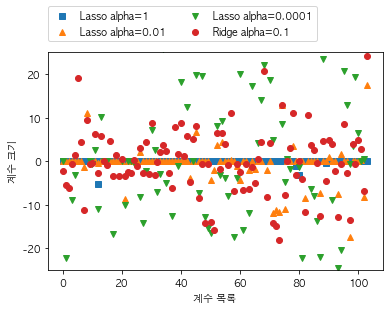

In [40]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

### Quantile Regressor

사이킷런 1.0 버전에서 하나의 예측값이 아니라 예측의 백분위 간격을 구하는 데 사용할 수 있는 QuantileRegressor 클래스가 추가되었습니다. quantile 매개변수에 예측하려는 매개변수를 0~1 사이로 지정합니다. 기본값은 0.5로 중간값을 예측합니다. 라소 모델과 비슷하게 alpha 매개변수로 L1규제를 조정합니다. alpha 매개변수의 기본값은 1.0이고 커질수록 규제가 강해져 과소적합된 모델을 만듭니다.

예를 들어 다음은 선형 회귀에 사용했던 wave 데이터셋을 사용해 훈련 세트에서 학습한 90%, 50%, 10% 백분위 범위를 테스트 세트와 함께 출력하는 코드입니다.

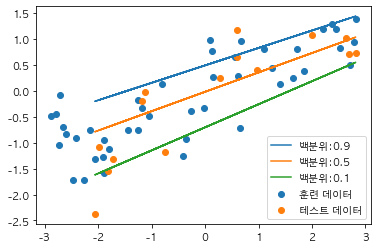

In [41]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train).predict(X_test)

plt.scatter(X_train, y_train, label='훈련 데이터')
plt.scatter(X_test, y_test, label="테스트 데이터")
plt.plot(X_test, pred_up, label="백분위:0.9")
plt.plot(X_test, pred_med, label="백분위:0.5")
plt.plot(X_test, pred_low, label="백분위:0.1")
plt.legend()
plt.show()

## 분류용 선형 모델

회귀에서 본 Ridge와 마찬가지로 이 두 모델은 기본적으로 L2 규제를 사용합니다.



LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C입니다. C의 값이 높아지면 규제가 감소합니다. 다시 말해 매개변수로 높은 C값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면에 C 값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듭니다. 



매개변수 C의 작동 방식을 다르게 설명할 수도 있습니다. 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것입니다.


회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것처럼 보입니다. 하지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적되지 않도록 하는 것이 매우 중요해집니다.



/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


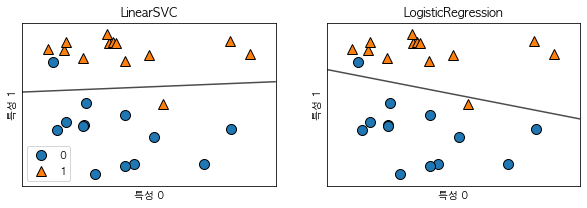

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

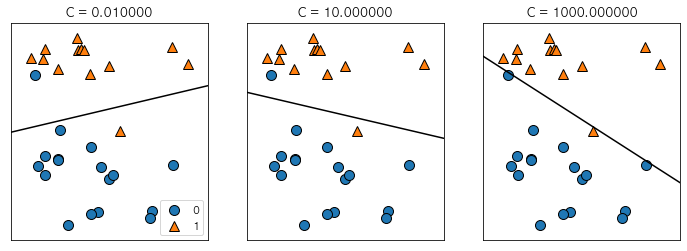

In [43]:
mglearn.plots.plot_linear_svc_regularization()

In [44]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))
print("사용한 특성 개수 :", np.sum(logreg.coef_ !=0))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958
사용한 특성 개수 : 30


In [45]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))
print("사용한 특성 개수 :", np.sum(logreg100.coef_ != 0))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965
사용한 특성 개수 : 30


In [46]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))
print("사용한 특성 개수 :", np.sum(logreg001.coef_ != 0))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951
사용한 특성 개수 : 30


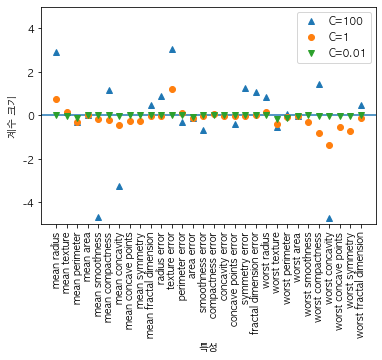

In [47]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


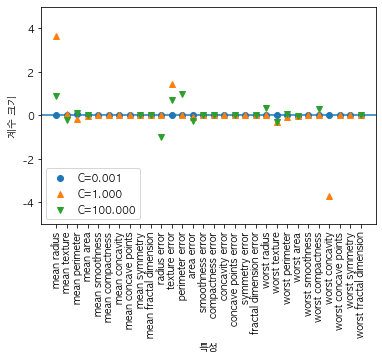

In [48]:
# L1 규제를 이용한 모델
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

LinearSVC는 loss 매개변수에 사용할 손실 함수를 지정합니다. 기본값은 제곱 힌지 손실인 'squared_hinge'입니다. 제곱 힌지 손실 함수는 penalty 매개변수에 'l1'과 'l2'를 지정할 수 있습니다. 다른 손실 함수로는 힌지 손실인 'hinge'를 지정할 수 있습니다. 이 때는 penalty 매개변수에 'l2'만 사용할 수 있습니다.



LogisticRegression은 penalty 매개변수에 L1과 L2 규제를 의미하는 'l1', 'l2' 그리고 L1, L2 규제를 모두 사용하는 'elasticnet', 마지막으로 규제를 사용하지 않으려면 'none'으로 지정할 수 있습니다. 사용할 알고리즘을 지정하는 solver 매개변수를 'saga'로 지정하면 모든 패널티를 지정할 수 있습니다. solver 매개변수를 'liblinear'로 지정하면 'l1', 'l2'를 지정할 수 있습니다. 그 외 'newton-cg', 'lbfgs', 'sag'는 'l2'와 'none'만 지원합니다.



LogisticRegression과 LinearSVC는 scikit-learn 0.20 버전부터 verbose 매개변수와 상관없이 알고리즘이 max_iter 반복 안에 수렴하지 않을 경우 반복 횟수를 증가하라는 경고를 출력합니다. LogisticRegression의 max_iter 기본값은 100이고, LinearSVC의 max_iter 기본값은 1,000입니다. LogisticRegression의 solver가 'sag', 'saga', 'liblinear'일 때나 LinearSVC는 기본적으로 훈련하기 전에 데이터를 섞습니다. 훈련 결과를 동일하게 재현해야 한다면 random_state 매개변수를 사용하세요.

### 다중 클래스 분류용 선형 모델

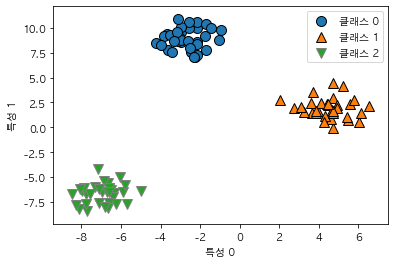

In [49]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [50]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


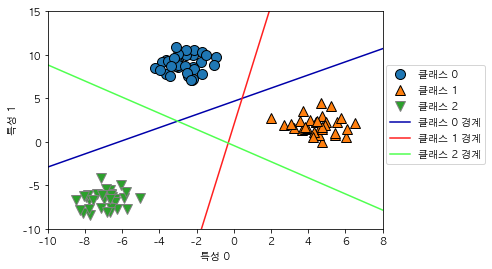

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

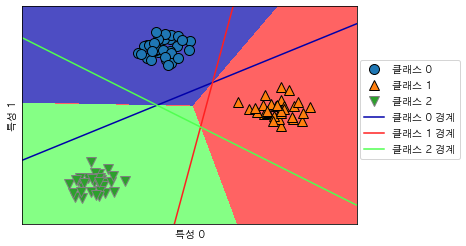

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 장단점과 매개변수

선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C입니다. alpha 값이 클수록, C값이 작을수록 모델이 단순해집니다. 특별히 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중요합니다. 보통 C와 alpha는 로그 스케일로 최적치를 정합니다. 그리고 L1규제를 사용할지 L2규제를 사용할지를 정해야 합니다. 중요한 특성이 많지 않다고 생각하면 L1규제를 사용합니다. 그렇지 않으면 기본적으로 L2 규제를 사용해야 합니다. L1 규제는 모델의 해석이 중요한 요소일 때도 사용할 수 있습니다. L1 규제는 몇 가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기 쉽습니다.

선형 모델은 학습 속도가 빠르고 예측도 빠릅니다. 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동합니다. 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver='sag'옵션을 줍니다. 다른 대안으로는 여기서 설명한 선형 모델의 대용량 처리 버전으로 구현된 SGDClassifier와 SGDRegressor를 사용할 수 있습니다.

선형 모델의 또 다른 장점은 앞서 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다는 것입니다. 하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있습니다. 특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때 그렇습니다. 그리고 이럴 땐 계수를 분석하기가 매우 어려울 수 있습니다.

선형 모델은 샘플에 비해 특성이 많을 때 잘 작동합니다. 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용합니다. 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋습니다. 

### SGDClassifier, SGDRegressor

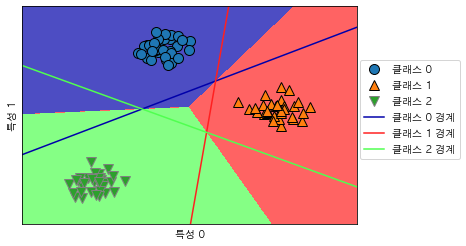

In [53]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive',
                        eta0=0.1, random_state=42, n_jobs=-1)
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [54]:
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(sgd_r.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(sgd_r.score(X_test, y_test)))

훈련 세트 점수: 0.91
테스트 세트 점수: 0.77


/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

## Naive Bayes

Naive Bayes는 선형 모델과 매우 유사합니다. LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 뒤집니다.



나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문입니다. scikit-learn에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이렇게 세 가지입니다. GaussianNB는 연속적인 어떤 데이터에도 적용할 수 있고 BernoulliNB는 이진 데이터를, MultinomialNB는 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 횟수입니다)에 적용됩니다. BernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용합니다.

--- 
다른 두 나이브 베이즈 모델 MultinomialNB와 GaussianNB는 계산하는 통계 데이터의 종류가 조금 다릅니다. MultinomialNB는 클래스별로 특성의 평균을 계산하고 GaussianNB는 클래스별로 각 특성의 분산과 평균을 저장합니다.

 

예측할 땐 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 합니다. MultinomialNB와 BernoulliNB의 예측 공식은 선형 모델과 형태가 같습니다. 그러나 나이브 베이즈 모델의 coef_는 기울기 w가 아니라서 선형 모델과는 의미가 다릅니다.



In [55]:
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [56]:
counts = {}

for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label] = X[y == label].sum(axis=0)
    
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 장단점과 매개변수

MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있습니다. alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가합니다. 이는 통계 데이터를 완만하게 만들어줍니다. alpha가 크면 더 완만해지고 모델의 복잡도는 낮아집니다. alpha에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않습니다. 그러나 이 값을 조정하면 어느 정도는 정확도를 높일 수 있습니다.



GaussianNB는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용합니다. MultinomialNB는 보통 0이 아닌 특성이 비교적 많은 데이터셋(예를 들어 큰 문서들)에서 BernoulliNB보다 성능이 높습니다.



나이브 베이즈 모델과 선형 모델의 장단점은 비슷합니다. 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽습니다. 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않습니다. 선형 모델로는 학습 시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하며 종종 사용됩니다.

## Decision Tree

일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됩니다. 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미입니다. 즉 훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있습니다. 



과대적합을 막는 전략은 크게 두 가지입니다.



트리 생성을 일찍 중단하는 전략(사전 가지치기 pre-pruning)과 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략입니다(사후 가지치기 post-pruning 또는 그냥 가지치기 pruning). 사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 또한 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것입니다.



scikit-learn에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현되어 있습니다. scikit-learn은 사전 가지치기만 지원합니다.

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

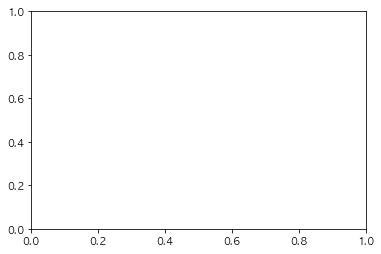

In [57]:
mglearn.plots.plot_animal_tree()

In [58]:
!pip install graphviz
!conda install graphviz 

Solving environment: - ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [62]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


### Tip

Decision Tree의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다. 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 ㅇ낳습니다.

In [63]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


In [64]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=["악성", "양성"],
                   feature_names=cancer.feature_names, impurity=False, filled=True)

In [65]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Decision Tree Feature Importance

전체 트리를 살펴보는 건 어려우므로 트리가 어떻게 작동하는지 요약하는 속성 사용

- 0이면 전혀 사용되지 않았다는 뜻
- 1이면 완벽하게 타깃 클래스를 예측했다는 뜻.
- Feature Importances의 전체 합은 1
- 어떤 특성의 feature_importances_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아니고 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있음
- 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없음. (양성 악성 모름)

In [66]:
print("Feature Importnace:\n", tree.feature_importances_)

Feature Importnace:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


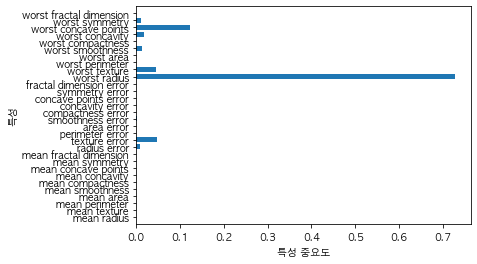

In [67]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

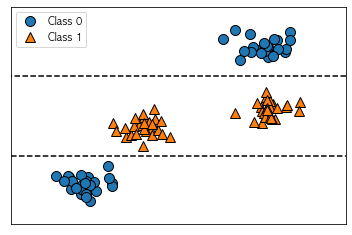

In [68]:
mglearn.plots.plot_tree_not_monotone()

In [69]:
ram_prices = pd.read_csv('https://raw.githubusercontent.com/rickiepark/intro_ml_with_python_2nd_revised/main/data/ram_price.csv')

Text(0, 0.5, '가격 ($/Mbyte)')

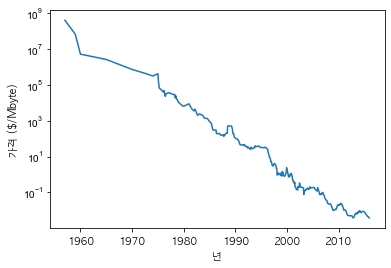

In [70]:
# 로그 스케일로 그린 램 가격 동향
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [79]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


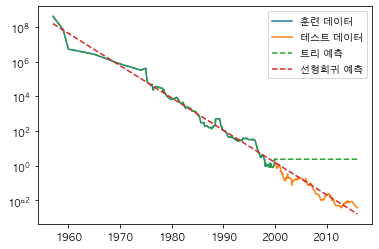

In [92]:
# 선형은 잘 근사하지만 트리는 개판임.
plt.semilogy(data_train.date, data_train.price, '-', label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, '-', label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, '--', label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, '--', label="선형회귀 예측")
plt.legend()

### 트리 모델 장단점과 매개변수

 

결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수입니다. 보통은 사전 가지치기 방법 중 max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분합니다.


결정 트리가 이전에 소개한 다른 알고리즘들보다 나은 점은 두 가지입니다.
 

첫째, 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽습니다(비교적 작은 트리일 때) 그리고 데이터의 스케일에 구애받지 않습니다. 각 특성이 개별적으로 처리되어 데이터를 분할하는 데 데이터의 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요 없습니다. 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동합니다.
 

결정 트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다는 것입니다. 그래서 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용합니다.



## 결정 트리의 앙상블

## RandomForest